In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200

In [3]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import numpy as np
from math import pi

from koala import example_graphs as eg
from koala import plotting3D as pl3d
from koala import plotting as pl

[ 27  26 119 120  33 114  10   9 105 106 104  70  69  97  98   1  11]
[ 27  26   2  25  85   5   4  80  76  52  51 122  61  60  59  58  88  40
  89 123]
[ 27  26   2  25  85   5   4  80  76  52  51 122  61  60  59  58  88  40
  89 123]
[ 27  26   2  25  85   5   4  80  76  52  51 122  61  60  59  58  88  40
  89 123]


Lattice(64 vertices, 10 edges)

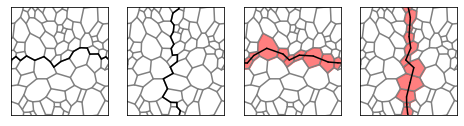

In [4]:
w = 4
black_line_widths = 1.5

def closest_vertex(lattice, point):
    distances = np.linalg.norm(lattice.vertices.positions - np.array(point)[None, :], ord = 2, axis = -1)
    return np.argmin(distances)

def closest_plaquette(lattice, point):
    positions = np.array([p.center for p in lattice.plaquettes])
    distances = np.linalg.norm(positions - np.array(point)[None, :], ord = 2, axis = -1)
    return np.argmin(distances)

from koala.flux_finder import pathfinding

def round_the_back_metric(x = False, y = False):
    def length(a, b) -> float:
        delta = a - b
        if x: delta[0] = 1 - delta[0] 
        if y: delta[1] = 1 - delta[1] 
        return np.linalg.norm(delta, ord = 2)
    return length

def __loop(lattice, direction, kind, center = 0.5):
    if kind == "graph":
        closest_thing = closest_vertex
        path = pathfinding.path_between_vertices
    elif kind == "dual":
        closest_thing = closest_plaquette
        path = pathfinding.path_between_plaquettes
    else: assert False
    
    points = np.array([[0.1, center], [0.5, center], [0.9, center]])
    if direction == 'y': points = points[:, ::-1]
    a, b, c = [closest_thing(lattice, p) for p in points]
    heuristic = round_the_back_metric(x = (direction == 'x'), y = (direction == 'y'))

    t1, e1 = path(lattice, a, b)
    t2, e2 = path(lattice, b, c)
    t3, e3 = path(lattice, c, a, heuristic=heuristic)

    return np.concatenate([t1[:-1], t2[:-1], t3[:-1]]), np.concatenate([e1, e2, e3])
    
def graph_loop(lattice, direction = 'x', center = 0.5):
     return __loop(lattice, direction = direction, kind = "graph", center = center)
    
def dual_loop(lattice, direction = 'x', center = 0.5):
     return __loop(lattice, direction = direction, kind = "dual", center = center)
   
rng = np.random.default_rng(222424252565)
lattice, colouring, ujk_ground_state = eg.make_amorphous(8, rng = rng)    

ncols = 4
fig, axes = plt.subplots(nrows=1, ncols=ncols)
fig.set_size_inches(2 * w, 2/ncols * w)

for ax in axes: ax.set(xticks = [], yticks = [])

ax = axes[0]
v, e = graph_loop(lattice, direction = "x")
print(v)
pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths, color = 'grey')
pl.plot_edges(lattice, subset = e, ax = ax)

ax = axes[1]
v, e = graph_loop(lattice, direction = "y")
print(v)
pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths, color = 'grey')
pl.plot_edges(lattice, subset = e, ax = ax)

ax = axes[2]
p, e = dual_loop(lattice, direction = "x")
print(v)
pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths, color = 'grey')
pl.plot_plaquettes(lattice, ax = ax, subset = p, alpha = 0.5)
pl.plot_dual(lattice, subset = e, ax = ax)

ax = axes[3]
p, e = dual_loop(lattice, direction = "y")
print(v)
pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths, color = 'grey')
pl.plot_plaquettes(lattice, ax = ax, subset = p, alpha = 0.5)
pl.plot_dual(lattice, subset = e, ax = ax)


# pl.plot_plaquettes(lattice, subset = p, ax = ax)
# pl.plot_edges(lattice, subset = e, ax = ax)
# pl.plot_dual(lattice, subset = e, ax = ax)


In [11]:
import polyscope as ps
from matplotlib.colors import to_rgb

rng = np.random.default_rng(222424252565)
lattice, colouring, ujk_ground_state = eg.make_amorphous(20, rng = rng)    


# Initialize
ps.init()
ps.set_up_dir("z_up")

pl3d.transform3D = pl3d.torus(1, 0.5, offsets = [0.5, 0])

py, ey = dual_loop(lattice, direction = "y")
px, ex = dual_loop(lattice, direction = "x")

p_labels = [i in set(px)|set(py) for i in range(lattice.n_plaquettes)]
pl3d.plot_plaquettes(lattice, labels = p_labels, 
                     color_scheme = ['grey', 'red'], transparency = 0.7);

edge_labels = [i in set(ex)|set(ey) for i in range(lattice.n_edges)]
pl3d.plot_edges(lattice, labels = edge_labels, color_scheme = ['grey', 'black'], radius = 0.002);


# Position the camera
ps.look_at((2, 2, 2), (.5, .5, .5))
ps.set_transparency_mode('none')

# Adjust some screenshot default settings if you'd like
ps.set_screenshot_extension(".png");

# Take a screenshot
# It will be written to your current directory as screenshot_000000.jpg, etc
ps.screenshot("ps.png")
# ps.show()
ps.remove_all_structures()

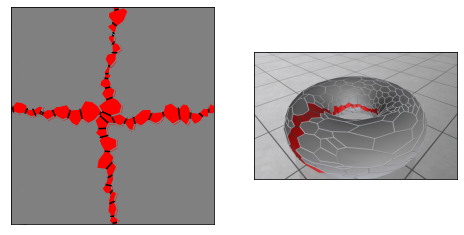

In [12]:
ncols = 2
fig, axes = plt.subplots(nrows=1, ncols=ncols)
fig.set_size_inches(2 * w, 2/ncols * w)

for ax in axes: ax.set(xticks = [], yticks = [])

ax = axes[0]
pl.plot_plaquettes(lattice, ax=ax, labels = p_labels, 
                     color_scheme = ['grey', 'red']);

pl.plot_edges(lattice, ax=ax, labels = edge_labels, color_scheme = ['grey', 'black']);

ax = axes[1]
import matplotlib.image as mpimg
img = mpimg.imread('ps.png')
ax.imshow(img)